<a href="https://colab.research.google.com/github/Fernando1729/zero/blob/master/EMD_Mello_Exemplo_2019_10_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
## Importing packages

# This R environment comes with all of CRAN and many other helpful packages preinstalled.
# You can see which packages are installed by checking out the kaggle/rstats docker image: 
# https://github.com/kaggle/docker-rstats

library(tidyverse) # metapackage with lots of helpful functions

library(tseriesChaos)

library(EMD)

## Running code

# In a notebook, you can run a single code cell by clicking in the cell and then hitting 
# the blue arrow to the left, or by clicking in the cell and pressing Shift+Enter. In a script, 
# you can run code by highlighting the code you want to run and then clicking the blue arrow
# at the bottom of this window.

## Reading in files

# You can access files from datasets you've added to this kernel in the "../input/" directory.
# You can see the files added to this kernel by running the code below. 

list.files(path = "../input")

## Saving data

# If you save any files or images, these will be put in the "output" directory. You 
# can see the output directory by committing and running your kernel (using the 
# Commit & Run button) and then checking out the compiled version of your kernel.

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


ERROR: ignored

In [0]:
dataset <- read_csv("/Paris.csv")

Parsed with column specification:
cols(
  STATION = col_character(),
  NAME = col_character(),
  DATE = col_date(format = ""),
  PRCP = col_double(),
  SNWD = col_logical(),
  TAVG = col_logical(),
  TMAX = col_double(),
  TMIN = col_double()
)
Warning message:
“30948 parsing failures.
 row  col           expected actual         file
1190 TAVG 1/0/T/F/TRUE/FALSE     53 '/Paris.csv'
1191 TAVG 1/0/T/F/TRUE/FALSE     49 '/Paris.csv'
1192 TAVG 1/0/T/F/TRUE/FALSE     46 '/Paris.csv'
1193 TAVG 1/0/T/F/TRUE/FALSE     47 '/Paris.csv'
1194 TAVG 1/0/T/F/TRUE/FALSE     46 '/Paris.csv'
.... .... .................. ...... ............
See problems(...) for more details.
”

In [0]:
data = as.matrix(dataset)

In [0]:
head(data)

STATION,NAME,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
FRM00007149,"ORLY, FR",1921-03-01,0.00,NA,NA,59,23
FRM00007149,"ORLY, FR",1921-03-02,0.10,NA,NA,57,24
FRM00007149,"ORLY, FR",1921-03-03,0.00,NA,NA,55,26
FRM00007149,"ORLY, FR",1921-03-04,0.01,NA,NA,48,27
FRM00007149,"ORLY, FR",1921-03-05,0.00,NA,NA,63,35
FRM00007149,"ORLY, FR",1921-03-06,0.07,NA,NA,54,36


In [0]:
dim(data)

[1] 89206     8

In [0]:
id = which(dataset[,"NAME"] == "ORLY, FR")

In [0]:
length(id)

[1] 28491

In [0]:
tmax <- dataset[id,]

In [0]:
dim(tmax)
length(tmax)

[1] 28491     8

[1] 8

In [0]:
t = tmax$TMAX

In [0]:
# Data cleansing (NA's e outliers)
t = t[2600:(2600 + 25345 - 1)]

In [0]:
length(t)

[1] 25345

In [0]:
install.packages("EMD")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘dotCall64’, ‘spam’, ‘maps’, ‘fields’, ‘locfit’



In [0]:
require(EMD)

Loading required package: EMD
Loading required package: fields
Loading required package: spam
Loading required package: dotCall64
Loading required package: grid
Spam version 2.3-0 (2019-09-13) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.

Attaching package: ‘spam’

The following objects are masked from ‘package:base’:

    backsolve, forwardsolve

Loading required package: maps

Attaching package: ‘maps’

The following object is masked from ‘package:purrr’:

    map

See https://github.com/NCAR/Fields for
 an extensive vignette, other supplements and source code 
Loading required package: locfit
locfit 1.5-9.1 	 2013-03-22


In [0]:
res = emd(t, boundary="wave")

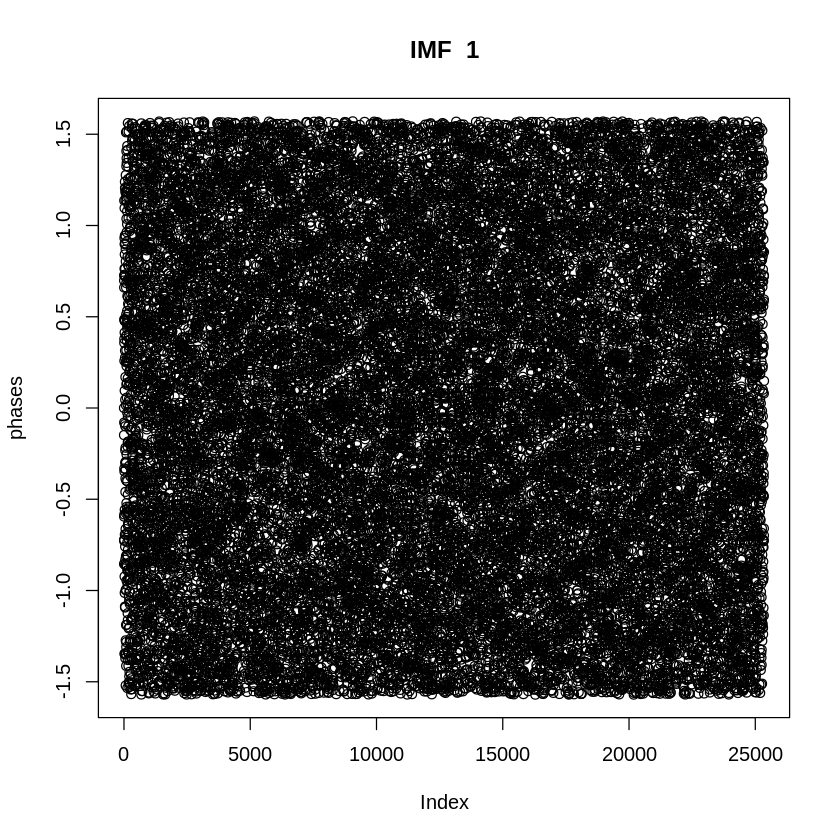

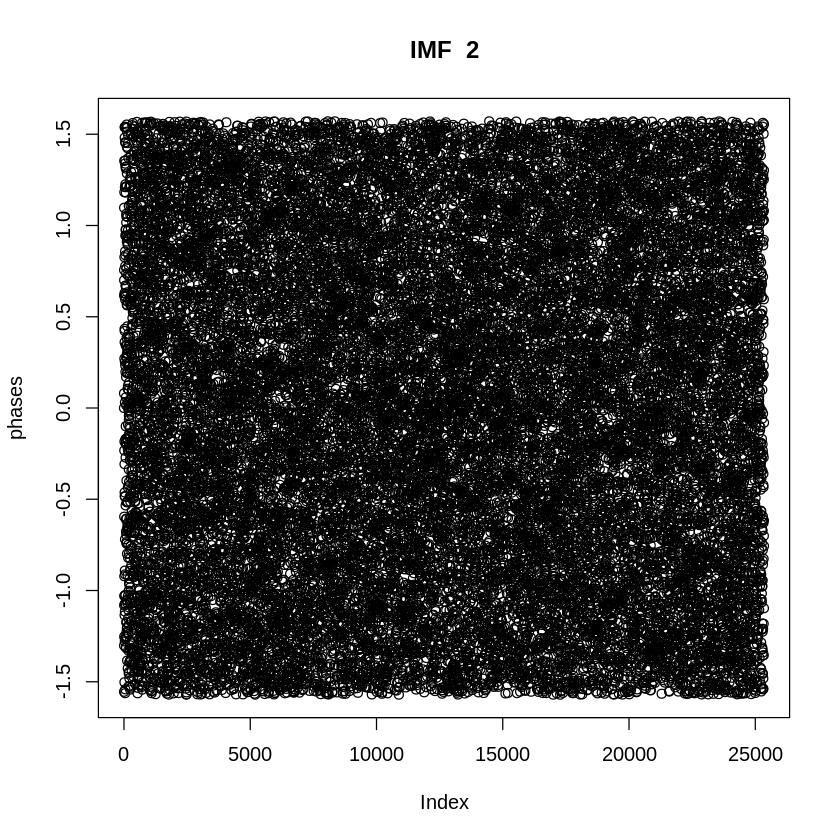

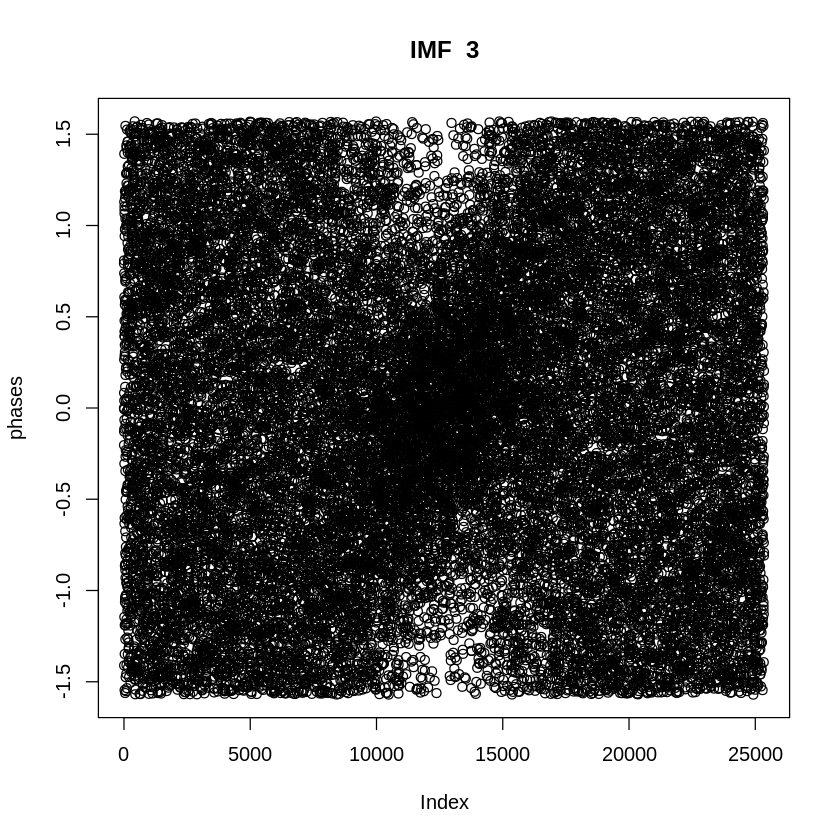

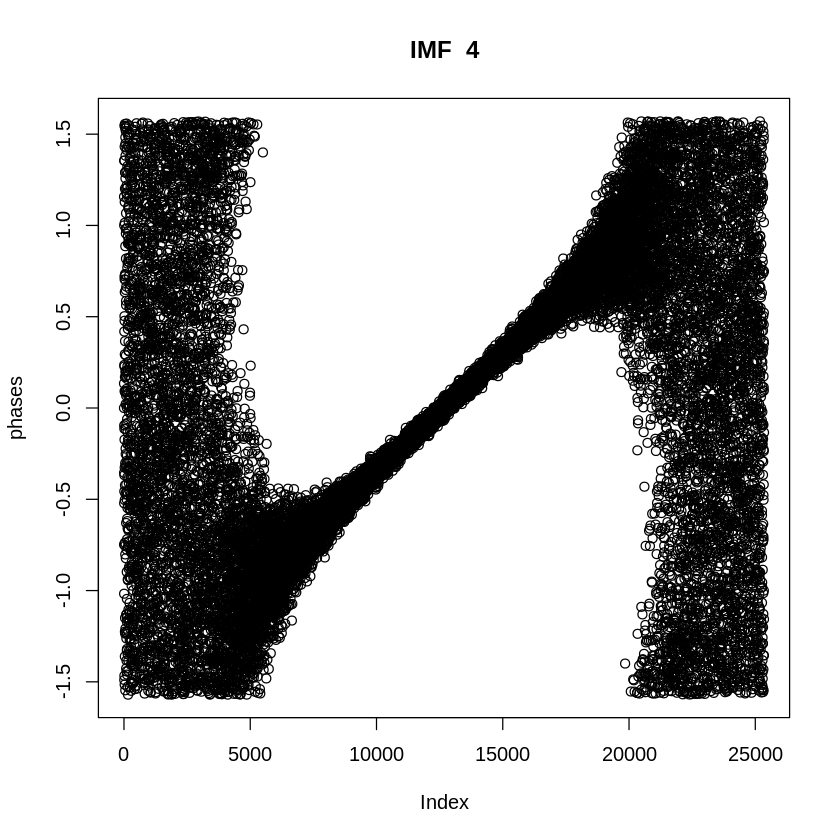

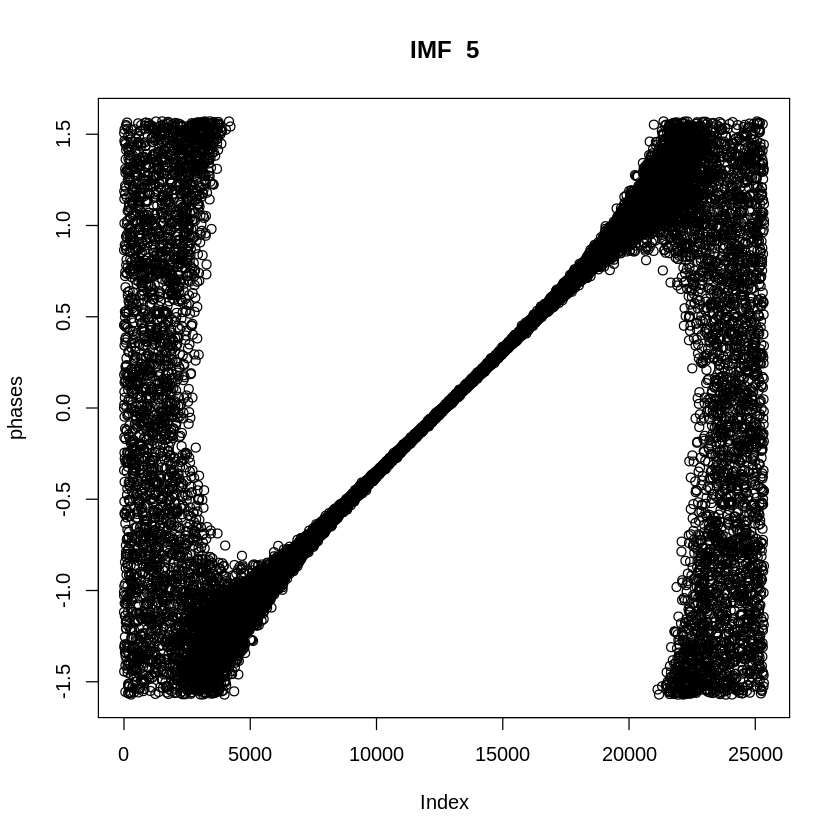

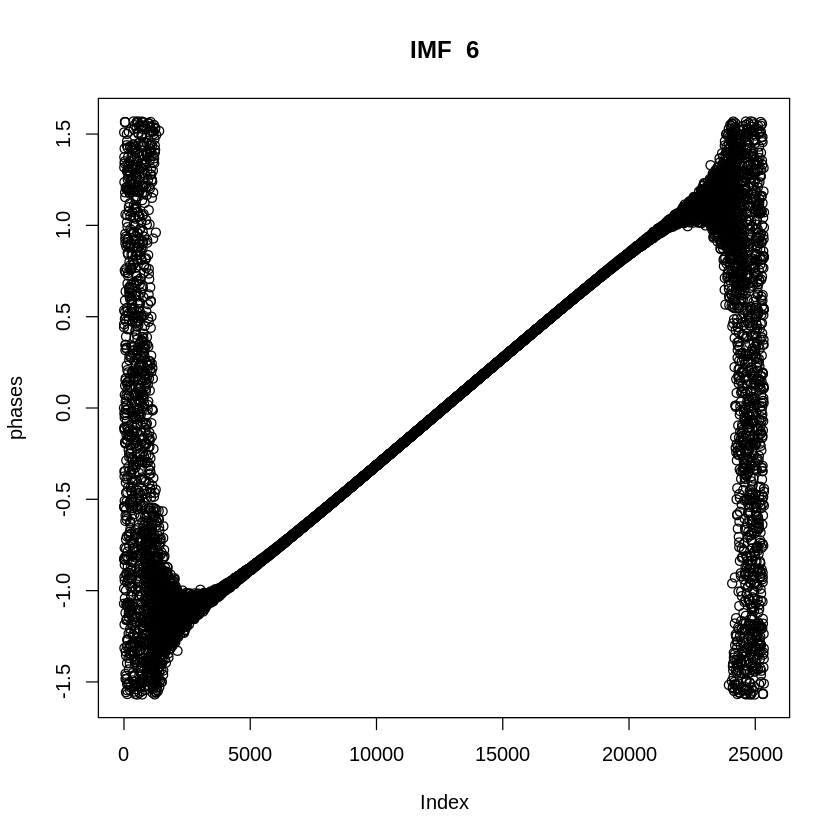

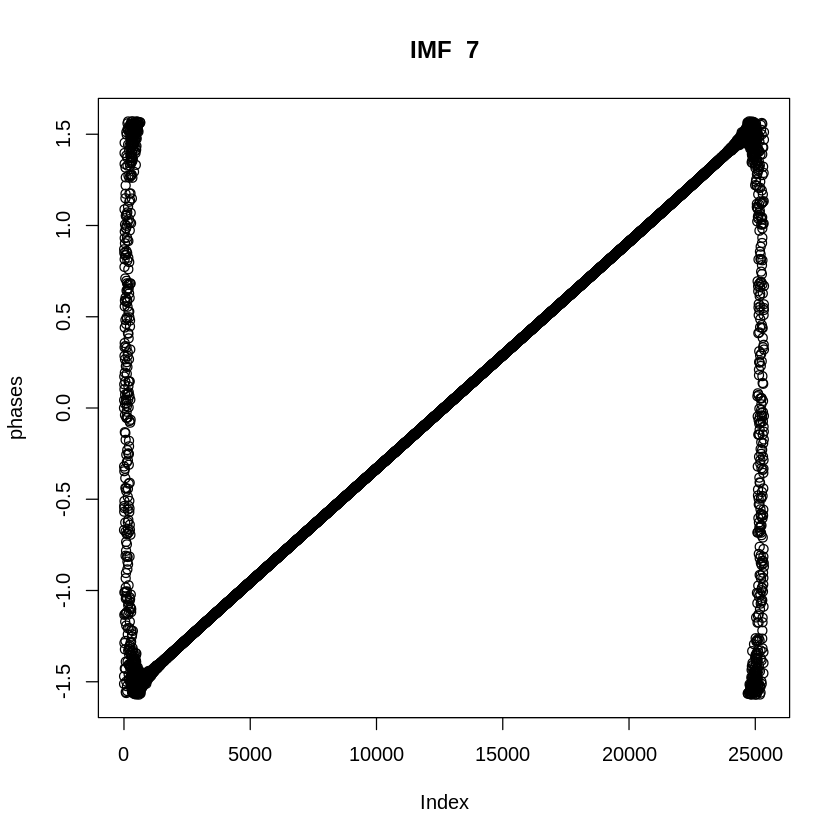

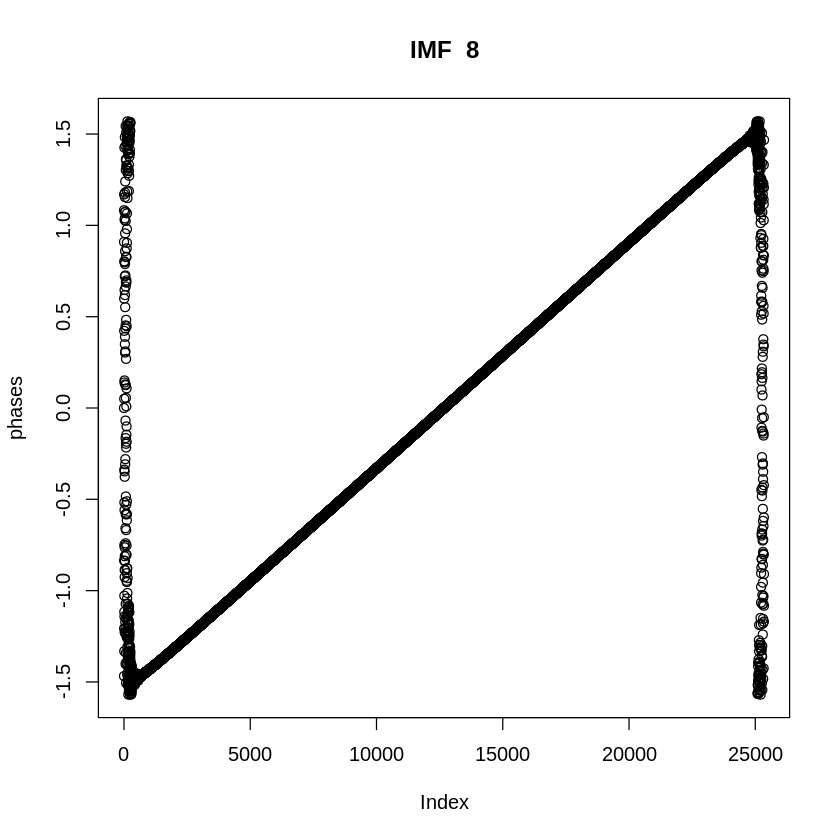

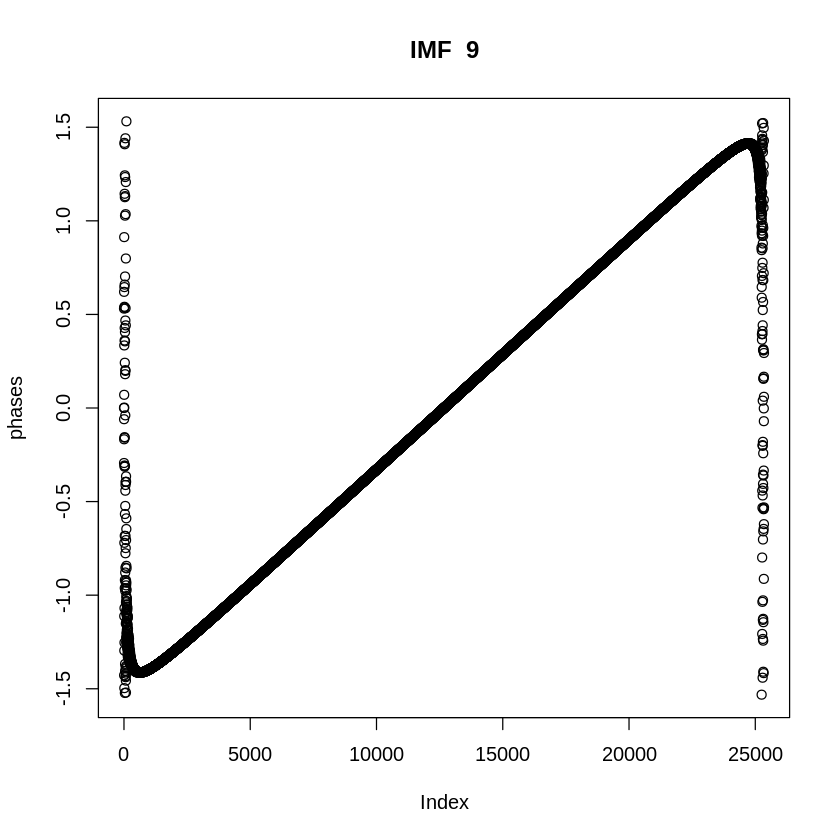

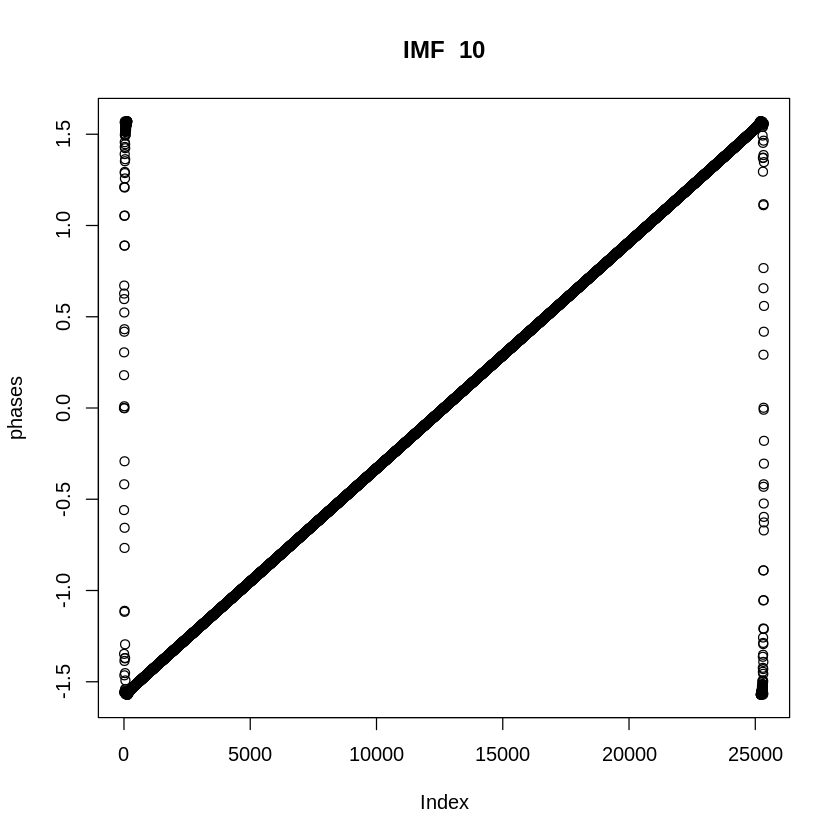

In [0]:
# Assessment of all IMFs (Intrinsic Mode Functions)
for (i in 1:res$nimf) {
	coeff = fft(res$imf[,i])
	phases = atan(Im(coeff)/Re(coeff))
	plot(phases, main=paste("IMF ", i))
	locator(1)
}

In [0]:
stochastic = rowSums(res$imf[,1:3])

In [0]:
deterministic = rowSums(res$imf[,4:res$nimf]) + res$residue

In [0]:
install.packages("tseriesChaos")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependency ‘deSolve’



In [0]:
require(tseriesChaos)

Loading required package: tseriesChaos


In [0]:
# AMI (Auto-Mutual Information) to estimate the separation dimension (d)
out = mutual(deterministic, lag.max=200, plot=F)
d = which(diff(out) > 0)[1]
cat("separation ", d, "\n")

separation  74 


In [0]:
str(res)

List of 3
 $ imf    : num [1:25345, 1:10] 1.846 -2.827 -7.461 -3.516 -0.571 ...
 $ residue: num [1:25345] 60 60 60 60 60 ...
 $ nimf   : num 10


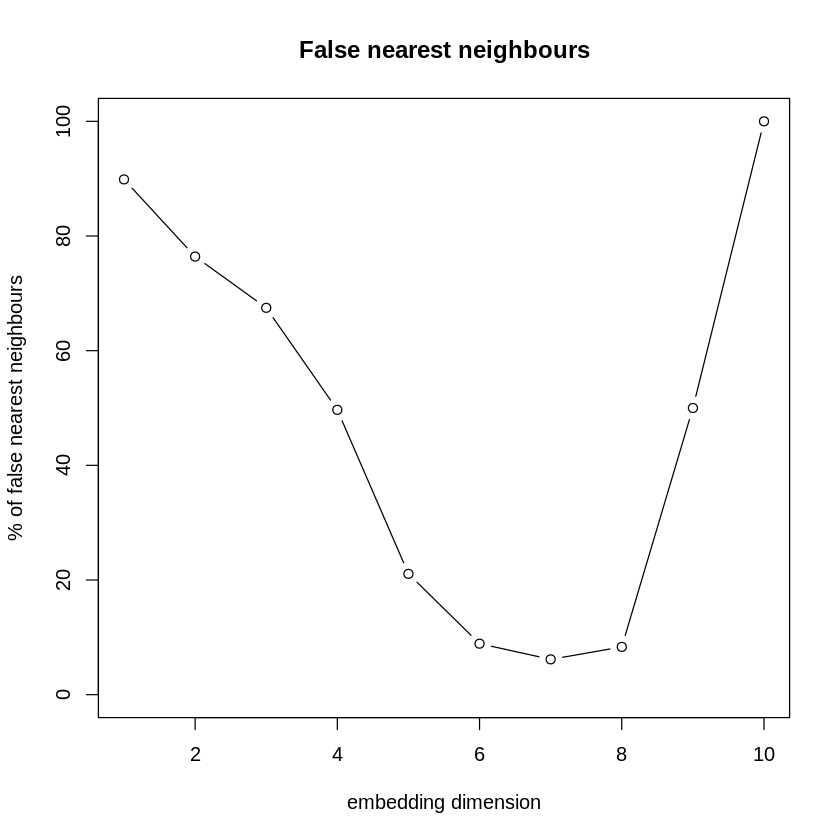

In [0]:
# False-Nearest Neighbors to estimate the embedding dimension (m)
plot(false.nearest(deterministic, m=10, d=d, t=1))
m = 7